kaggle link: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

In [16]:
install.packages("dplyr")
install.packages("ggplot2")


Installing package into 'C:/Users/phuon/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\phuon\AppData\Local\Temp\RtmpczQJSi\downloaded_packages


Installing package into 'C:/Users/phuon/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\phuon\AppData\Local\Temp\RtmpczQJSi\downloaded_packages


In [17]:
library(dplyr)

# Read the dataset
data <- read.csv("adult.csv")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
head(data)

,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
dim(data)

[1] 48842    15

In [6]:
summary(data)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:48842       Min.   :  12285   Length:48842      
 1st Qu.:28.00   Class :character   1st Qu.: 117551   Class :character  
 Median :37.00   Mode  :character   Median : 178145   Mode  :character  
 Mean   :38.64                      Mean   : 189664                     
 3rd Qu.:48.00                      3rd Qu.: 237642                     
 Max.   :90.00                      Max.   :1490400                     
 educational.num marital.status      occupation        relationship      
 Min.   : 1.00   Length:48842       Length:48842       Length:48842      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [7]:
sapply(data, class)

age       workclass          fnlwgt       education educational.num 
      "integer"     "character"       "integer"     "character"       "integer" 
 marital.status      occupation    relationship            race          gender 
    "character"     "character"     "character"     "character"     "character" 
   capital.gain    capital.loss  hours.per.week  native.country          income 
      "integer"       "integer"       "integer"     "character"     "character"

### Error Handling

In [3]:
# List all the columns
columns <- colnames(data)
print(columns)

 [1] "age"             "workclass"       "fnlwgt"          "education"      
 [5] "educational.num" "marital.status"  "occupation"      "relationship"   
 [9] "race"            "gender"          "capital.gain"    "capital.loss"   
[13] "hours.per.week"  "native.country"  "income"         


- The "fnlwgt" column represents the final weight, which is a statistical weight assigned to each individual in the survey data. This weight is often used to adjust for sampling biases and make the data more representative of the target population. 
- Even though I do not have enough domain knowledge to fully understand what fnlwgt but I decided to keep it since it probably might provide insights into its relevance and usefulness.



In [9]:
columns_with_null <- colnames(data)[apply(data == "?", 2, any)]

# Display the columns with null values
print(columns_with_null)

[1] "workclass"      "occupation"     "native.country"


In [11]:
head(data$workclass)

[1] "Private"   "Private"   "Local-gov" "Private"   "?"         "Private"

In [12]:
head(data$occupation)

[1] "Machine-op-inspct" "Farming-fishing"   "Protective-serv"  
[4] "Machine-op-inspct" "?"                 "Other-service"

In [13]:
head(data$native.country)

[1] "United-States" "United-States" "United-States" "United-States"
[5] "United-States" "United-States"

- We will replace those null values represented by "?" with "NA"

In [26]:
data$workclass[data$workclass == "?"] <- NA
data$occupation[data$occupation == "?"] <- NA
data$native.country[data$native.country == "?"] <- NA

In [25]:
#test
head(data$workclass)

[1] "Private"   "Private"   "Local-gov" "Private"   NA          "Private"

#### Double check for null values

In [27]:
colSums(is.na(data))

age       workclass          fnlwgt       education educational.num 
              0            2799               0               0               0 
 marital.status      occupation    relationship            race          gender 
              0            2809               0               0               0 
   capital.gain    capital.loss  hours.per.week  native.country          income 
              0               0               0             857               0

From the result we now got the dataset with none of the incorrect values. 

### Dataset description

- age: The age of the individual.
- workclass: The type of workclass or employment status of the individual.
- fnlwgt: A weighting factor used in statistical calculations
- education: The highest level of education completed by the individual.
- educational.num: The number of years of education completed by the individual.
- marital.status: The marital status of the individual.
- occupation: The occupation of the individual.
- relationship: The relationship status of the individual.
- race: The race of the individual.
- gender: The gender of the individual.
- capital.gain: The amount of capital gains for the individual.
- capital.loss: The amount of capital losses for the individual.
- hours.per.week: The number of hours worked per week by the individual.
- native.country: The native country of the individual.
- income: The income level of the individual, categorized as either "<=50K" or ">50K"

### Detect and remove outliers

In [18]:
dim(data)

[1] 48842    15

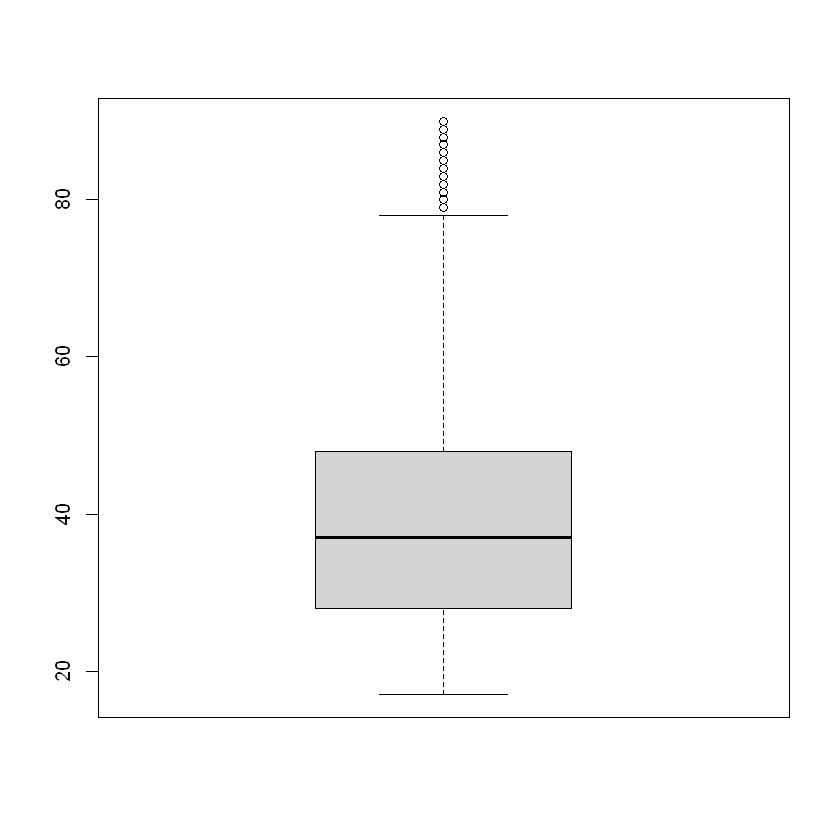

In [22]:
boxplot(data$age)

In [30]:
# Age column
Q1_age <- quantile(data$age, 0.25)
Q3_age <- quantile(data$age, 0.75)

# Calculate IQR for 'age'
IQR_age <- Q3_age - Q1_age

# Define lower and upper boundaries
lower_bound_age <- Q1_age - 1.5 * IQR_age
upper_bound_age <- Q3_age + 1.5 * IQR_age

# Detect and remove outliers for 'age'
filtered_data <- data[data$age > lower_bound_age & data$age < upper_bound_age, ]


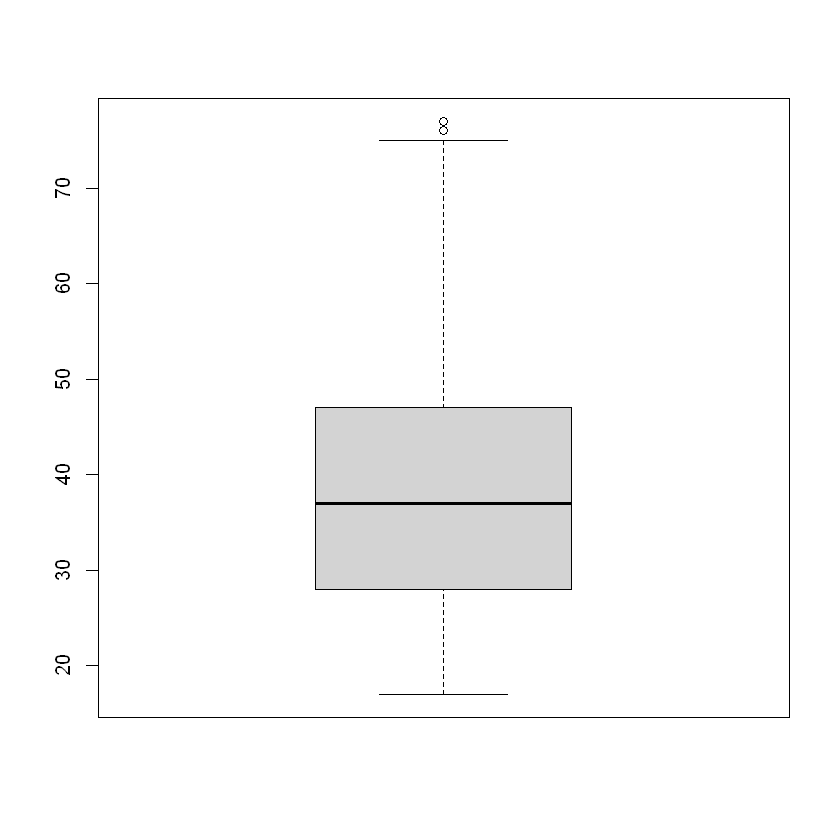

In [31]:
boxplot(filtered_data$age)

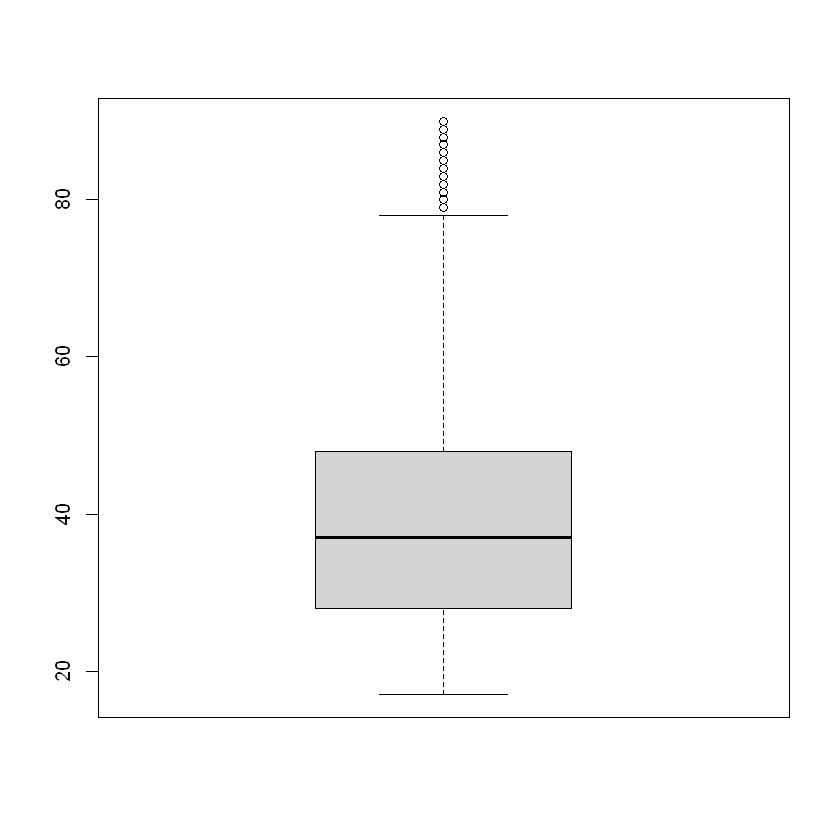

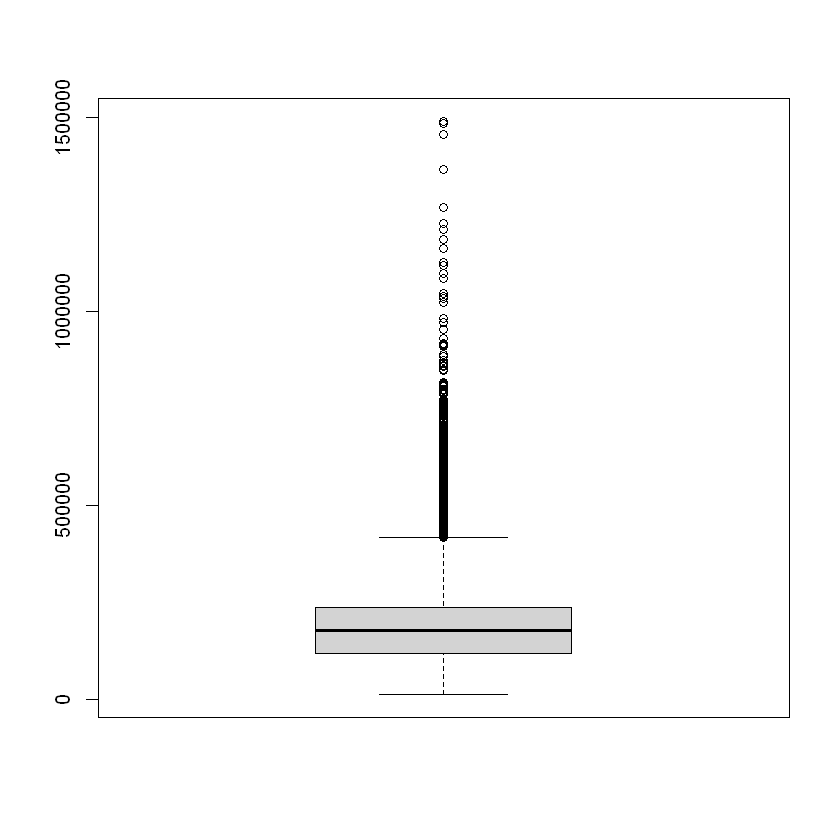

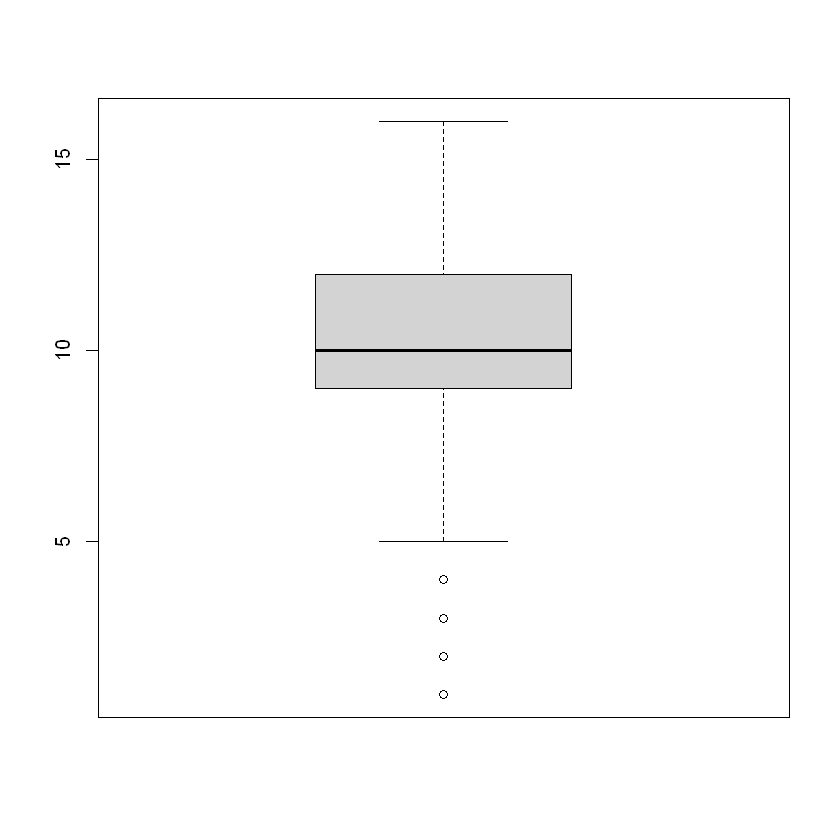

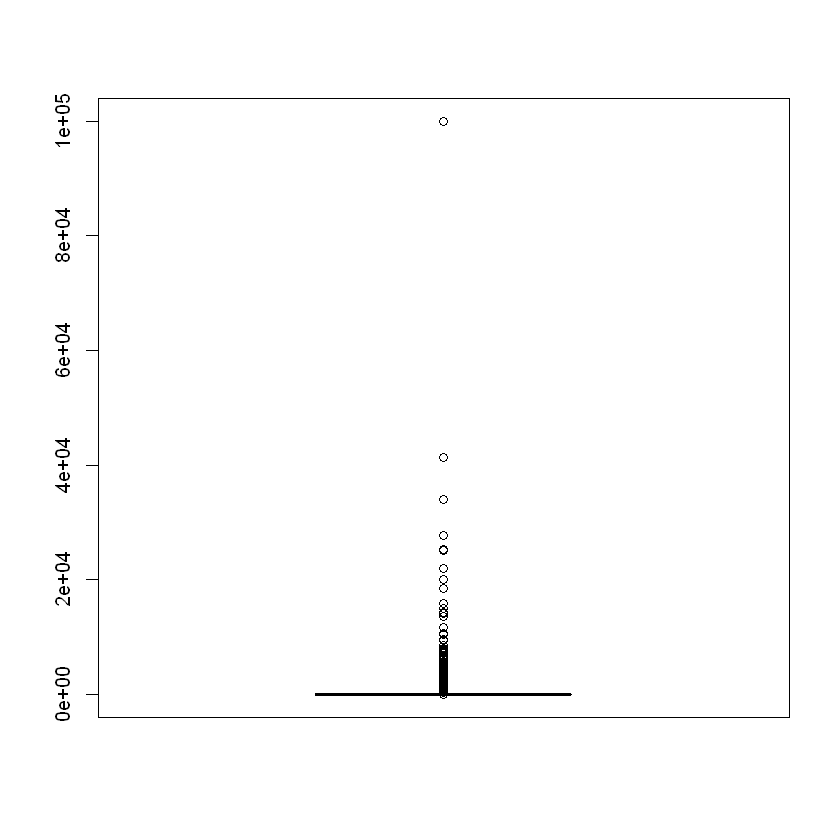

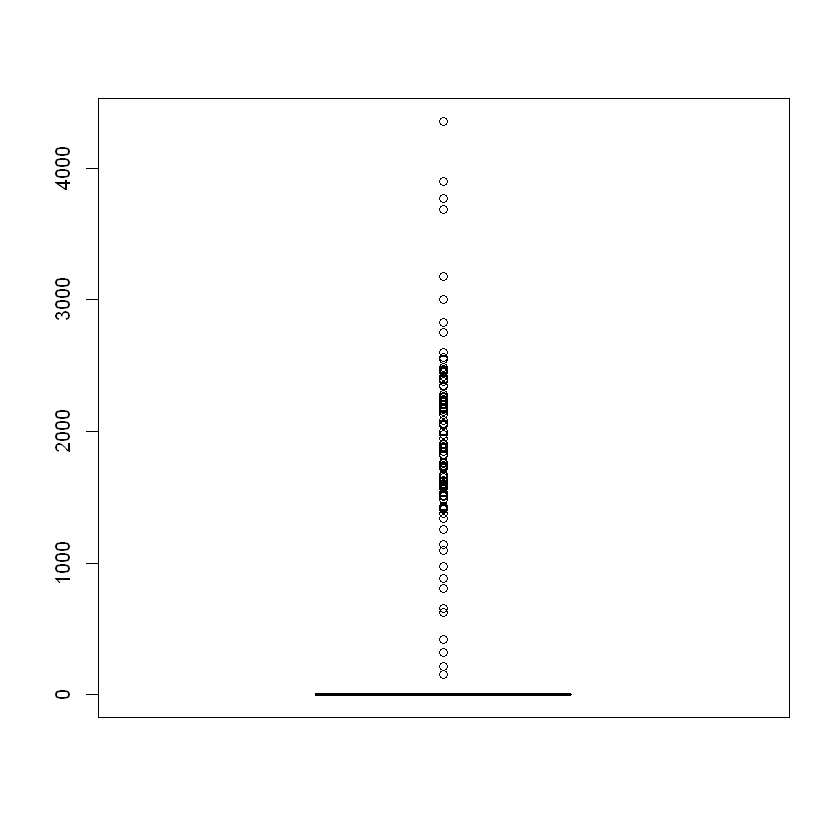

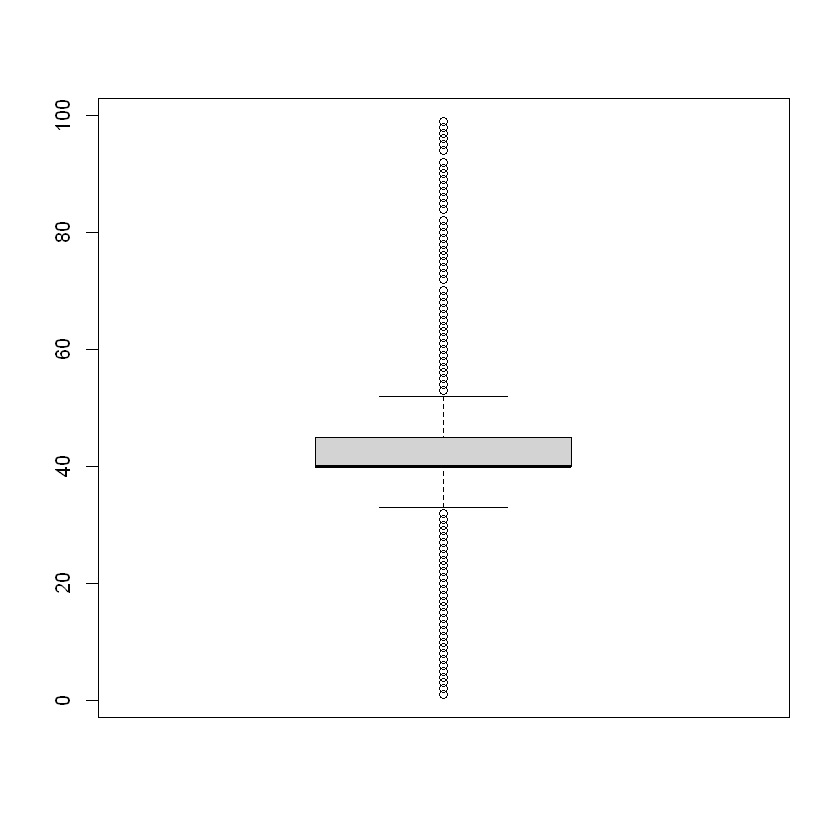

In [37]:
boxplot(data$age)
boxplot(data$fnlwgt)
boxplot(data$educational.num)
boxplot(data$capital.gain)
boxplot(data$capital.loss)
boxplot(data$hours.per.week)


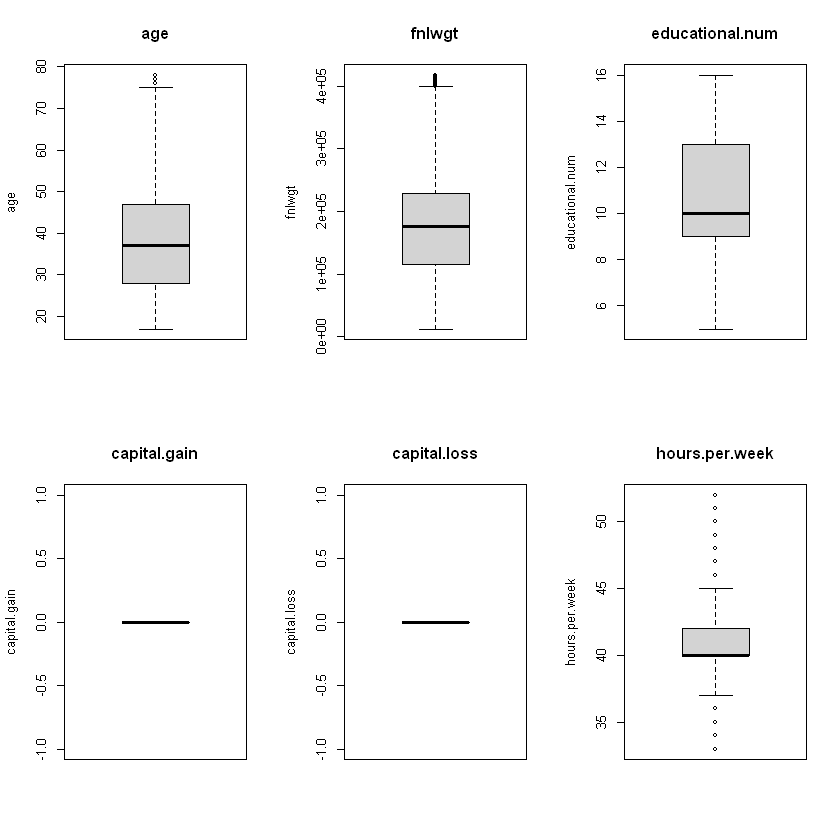

In [38]:
# Define a function to detect and remove outliers using IQR
remove_outliers <- function(data, column) {
  Q1 <- quantile(data[[column]], 0.25)
  Q3 <- quantile(data[[column]], 0.75)
  IQR_val <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR_val
  upper_bound <- Q3 + 1.5 * IQR_val
  return(data[data[[column]] >= lower_bound & data[[column]] <= upper_bound, ])
}

# List of numerical columns
numerical_columns <- c("age", "fnlwgt", "educational.num", "capital.gain", "capital.loss", "hours.per.week")

# Create boxplots and remove outliers for all numerical columns
par(mfrow=c(2, 3))  # Adjust the layout based on the number of numerical columns

for (col in numerical_columns) {
  # Remove outliers
  filtered_data <- remove_outliers(data, col)
  
  # Create a boxplot
  boxplot(filtered_data[[col]], main = col, ylab = col)
}

# Reset the plot layout
par(mfrow=c(1, 1))


### Installing packages

In [40]:
install.packages("caret")

Installing package into 'C:/Users/phuon/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'listenv', 'parallelly', 'future', 'globals', 'future.apply', 'progressr', 'SQUAREM', 'diagram', 'lava', 'prodlim', 'clock', 'gower', 'hardhat', 'ipred', 'timeDate', 'e1071', 'ModelMetrics', 'pROC', 'recipes'




package 'listenv' successfully unpacked and MD5 sums checked
package 'parallelly' successfully unpacked and MD5 sums checked
package 'future' successfully unpacked and MD5 sums checked
package 'globals' successfully unpacked and MD5 sums checked
package 'future.apply' successfully unpacked and MD5 sums checked
package 'progressr' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'diagram' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'clock' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'hardhat' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'ModelMetrics' su

In [42]:
library(caret)
library(ggplot2)

In [92]:
index <- sample(1:nrow(data), size = 0.3*nrow(data))

# 30% for test and 70% for training 
knn_test <- data[index,]
knn_train <- data[-index,]

In [45]:
dim(knn_test)

[1] 14652    15

In [93]:
dim(knn_train)

[1] 34190    15

### Finding k-Value 

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1709500)"


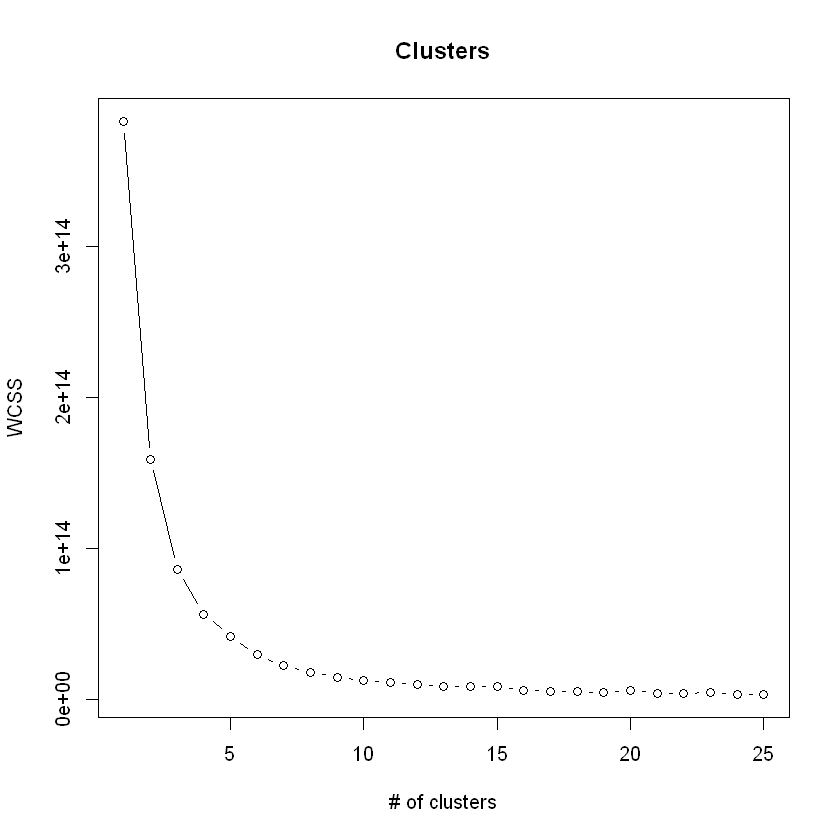

In [94]:
set.seed(123)

# Select only numerical columns from knn_train
numerical_cols <- sapply(knn_train, is.numeric)
knn_train <- knn_train[, numerical_cols]

wcss <- vector()

# Perform k-means clustering
for (i in 1:25) {
  wcss[i] <- sum(kmeans(knn_train, centers = i)$tot.withinss)
}

# Plot the Within-Cluster-Sum-of-Squares (WCSS)
plot(1:25, wcss, type = 'b', main = 'Clusters', xlab = '# of clusters', ylab = 'WCSS')


After k = 10, the error rate seems to be stopped. Therfore, I'll assume that k = 10.

### Creating the model

Because the target column has the data type is char so I will convert it into numrical by assigning "<=50K" is 0 and ">=50K" is 1.

In [69]:
# Convert income column to numerical values
data$income <- ifelse(data$income == "<=50K", 0, 1)

In [67]:
target_test <- data[index, 15]
target_train <- data[-index, 15]

In [97]:
print(length(target_train))

[1] 34190


In [100]:
numerical_cols_test <- sapply(knn_test, is.numeric)
knn_test <- knn_test[, numerical_cols_test]

In [77]:
library(class)

In [102]:
knn_model <- knn(train = knn_train, test = knn_test, cl = target_train, k = 10)

In [105]:
install.packages("gmodels")
library(gmodels)

Installing package into 'C:/Users/phuon/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'gtools', 'gdata'




package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\phuon\AppData\Local\Temp\RtmpczQJSi\downloaded_packages


In [106]:
CrossTable(x = target_test, y = knn_model, prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14652 

 
             | knn_model 
 target_test |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |     10649 |       497 |     11146 | 
             |     0.955 |     0.045 |     0.761 | 
             |     0.759 |     0.806 |           | 
             |     0.727 |     0.034 |           | 
-------------|-----------|-----------|-----------|
           1 |      3386 |       120 |      3506 | 
             |     0.966 |     0.034 |     0.239 | 
             |     0.241 |     0.194 |           | 
             |     0.231 |     0.008 |           | 
-------------|-----------|-----------|-----------|
Column Total |     14035 |       617 |     14652 | 
             |     0.958 |     0.042 |           | 
-------------|----

## Interpretation

There are 14654 observations in the test. With the crosstable's result,we can tell that the knn model predicts pretty accurate. 
There are (10649 +  617) correct predictions oout of total of 14654 observations. 

In the cell where the actual label is 0 and the predicted label is 1, the count is 497.
In the cell where the actual label is 1 and the predicted label is 0, the count is 3,386.
In the cell where the actual label is 1 and the predicted label is 1, the count is 120.
N / Row Total:

In the first row, which represents the actual label 0, 95.5% of the observations (10,649 out of 11,146) were correctly predicted as label 0, and 4.5% (497 out of 11,146) were misclassified as label 1.
In the second row, which represents the actual label 1, 96.6% of the observations (3,386 out of 3,506) were correctly predicted as label 1, and 3.4% (120 out of 3,506) were misclassified as label 0.
N / Col Total:

In the first column, which represents the predicted label 0, 75.9% of the observations (10,649 out of 14,035) were correctly classified as label 0, and 24.1% (3,386 out of 14,035) were misclassified as label 1.
In the second column, which represents the predicted label 1, 80.6% of the observations (497 out of 617) were correctly classified as label 1, and 19.4% (120 out of 617) were misclassified as label 0.
N / Table Total:

In the cell where both the actual and predicted labels are 0, 72.7% of all observations (10,649 out of 14,652) fall into this category.
In the cell where both the actual and predicted labels are 1, 0.8% of all observations (120 out of 14,652) fall into this category.